In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_src = pd.read_csv("../data/stability/riboswitch_zinb_norm.csv")
df_src

,seq,replicate,exp_type,1,2,3,4,5,6,7,8,fold
0,ATACGTTAACGCGTATGGGCCTGGGGCCGGTAGAGGCTCCCCAGGG...,1,RNA,207,306,146,297,307,307,155,244,train
1,ATACGTTAACGCGTATGGGCCTGGGGCCGGTAGAGGCTCCCCAGGG...,1,gDNA,1275,1147,663,922,957,1196,843,1409,train
2,ATACGTTAACGCGTATGGGCCTGGGGCCGGTAGAGGCTCCCCAGGG...,2,RNA,311,213,399,413,398,191,245,312,train
3,ATACGTTAACGCGTATGGGCCTGGGGCCGGTAGAGGCTCCCCAGGG...,2,gDNA,1442,930,1093,947,1858,689,652,2017,train
4,ATACGTTAACGCGTATGGGGTGAGGGGGCCCTGAATCAGGGGTGAC...,1,RNA,405,407,264,423,386,216,489,345,train
...,...,...,...,...,...,...,...,...,...,...,...,...
29957,ATACGTTAACGCGTATGGCTGTGGGCTGGAAAACCACTGGGTGCGT...,2,gDNA,1136,4930,7080,5579,2636,3990,2472,2510,train
29958,ATACGTTAACGCGTATGGCCACTCGTGTTCCTTCAGGGGGTACTGC...,1,RNA,474,618,455,509,658,533,1009,451,train
29959,ATACGTTAACGCGTATGGCCACTCGTGTTCCTTCAGGGGGTACTGC...,1,gDNA,1619,1231,2322,2280,2385,1546,816,1514,train
29960,ATACGTTAACGCGTATGGCCACTCGTGTTCCTTCAGGGGGTACTGC...,2,RNA,317,226,332,315,387,293,334,207,train


In [3]:
df_src.groupby(["exp_type", "replicate"])[[str(i) for i in range(1, 9)]].mean()

1            2            3            4  \
exp_type replicate                                                       
RNA      1           321.026193   321.117065   321.028331   320.969130   
         2           320.750200   320.967807   320.895138   320.841437   
gDNA     1          2084.497400  2084.888785  2082.659955  2082.182024   
         2          2085.265813  2085.788364  2082.928610  2097.141046   

                              5            6            7            8  
exp_type replicate                                                      
RNA      1           320.887879   320.947615   321.319792   321.630496  
         2           321.059044   320.831151   321.074806   321.462864  
gDNA     1          2083.329111  2083.632084  2083.512735  2084.634085  
         2          2083.363758  2082.627702  2083.853750  2086.181612

In [4]:
start = "ATACGTTAACGCGTATGG"
end = "TTAATTAATCTAGCCTACAATTCACG"
print("start:", df_src["seq"].str.startswith(start).sum())
print("end:  ", df_src["seq"].str.endswith(end).sum())

start: 29962
end:   29962


In [5]:
df_src["old_seq"] = df_src["seq"]
df_src["seq"] = df_src["old_seq"].str[len(start):-len(end)]

In [6]:
df = df_src[df_src["seq"].str.len() == 186]
df.reset_index(drop=True, inplace=True)
df

,seq,replicate,exp_type,1,2,3,4,5,6,7,8,fold,old_seq
0,GCCTGGGGCCGGTAGAGGCTCCCCAGGGCTCCCTTATGTCCACCAC...,1,RNA,207,306,146,297,307,307,155,244,train,ATACGTTAACGCGTATGGGCCTGGGGCCGGTAGAGGCTCCCCAGGG...
1,GCCTGGGGCCGGTAGAGGCTCCCCAGGGCTCCCTTATGTCCACCAC...,1,gDNA,1275,1147,663,922,957,1196,843,1409,train,ATACGTTAACGCGTATGGGCCTGGGGCCGGTAGAGGCTCCCCAGGG...
2,GCCTGGGGCCGGTAGAGGCTCCCCAGGGCTCCCTTATGTCCACCAC...,2,RNA,311,213,399,413,398,191,245,312,train,ATACGTTAACGCGTATGGGCCTGGGGCCGGTAGAGGCTCCCCAGGG...
3,GCCTGGGGCCGGTAGAGGCTCCCCAGGGCTCCCTTATGTCCACCAC...,2,gDNA,1442,930,1093,947,1858,689,652,2017,train,ATACGTTAACGCGTATGGGCCTGGGGCCGGTAGAGGCTCCCCAGGG...
4,GGTGAGGGGGCCCTGAATCAGGGGTGACTAGTCCTCATACCCCCCA...,1,RNA,405,407,264,423,386,216,489,345,train,ATACGTTAACGCGTATGGGGTGAGGGGGCCCTGAATCAGGGGTGAC...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29813,CTGTGGGCTGGAAAACCACTGGGTGCGTCTCTTGCTGGGGTTTGCC...,2,gDNA,1136,4930,7080,5579,2636,3990,2472,2510,train,ATACGTTAACGCGTATGGCTGTGGGCTGGAAAACCACTGGGTGCGT...
29814,CCACTCGTGTTCCTTCAGGGGGTACTGCTGGCTGAGGCCCCTGACT...,1,RNA,474,618,455,509,658,533,1009,451,train,ATACGTTAACGCGTATGGCCACTCGTGTTCCTTCAGGGGGTACTGC...
29815,CCACTCGTGTTCCTTCAGGGGGTACTGCTGGCTGAGGCCCCTGACT...,1,gDNA,1619,1231,2322,2280,2385,1546,816,1514,train,ATACGTTAACGCGTATGGCCACTCGTGTTCCTTCAGGGGGTACTGC...
29816,CCACTCGTGTTCCTTCAGGGGGTACTGCTGGCTGAGGCCCCTGACT...,2,RNA,317,226,332,315,387,293,334,207,train,ATACGTTAACGCGTATGGCCACTCGTGTTCCTTCAGGGGGTACTGC...


In [7]:
KEEP_BINS = ["3", "4", "5", "6"]
df = df[["seq", "replicate", "exp_type", "fold", *KEEP_BINS]].copy().set_index(["seq", "replicate", "exp_type", "fold"])
df

3  \
seq                                                replicate exp_type fold          
GCCTGGGGCCGGTAGAGGCTCCCCAGGGCTCCCTTATGTCCACCACT... 1         RNA      train   146   
                                                             gDNA     train   663   
                                                   2         RNA      train   399   
                                                             gDNA     train  1093   
GGTGAGGGGGCCCTGAATCAGGGGTGACTAGTCCTCATACCCCCCAT... 1         RNA      train   264   
...                                                                           ...   
CTGTGGGCTGGAAAACCACTGGGTGCGTCTCTTGCTGGGGTTTGCCC... 2         gDNA     train  7080   
CCACTCGTGTTCCTTCAGGGGGTACTGCTGGCTGAGGCCCCTGACTT... 1         RNA      train   455   
                                                             gDNA     train  2322   
                                                   2         RNA      train   332   
                                                             gDNA     train  2259   

                                                                                4  \
seq                                                replicate exp_type fold          
GCCTGGGGCCGGTAGAGGCTCCCCAGGGCTCCCTTATGTCCACCACT... 1         RNA      train   297   
                                                             gDNA     train   922   
                                                   2         RNA      train   413   
                                                             gDNA     train   947   
GGTGAGGGGGCCCTGAATCAGGGGTGACTAGTCCTCATACCCCCCAT... 1         RNA      train   423   
...                                                                           ...   
CTGTGGGCTGGAAAACCACTGGGTGCGTCTCTTGCTGGGGTTTGCCC... 2         gDNA     train  5579   
CCACTCGTGTTCCTTCAGGGGGTACTGCTGGCTGAGGCCCCTGACTT... 1         RNA      train   509   
                                                             gDNA     train  2280   
                                                   2         RNA      train   315   
                                                             gDNA     train  3479   

                                                                                5  \
seq                                                replicate exp_type fold          
GCCTGGGGCCGGTAGAGGCTCCCCAGGGCTCCCTTATGTCCACCACT... 1         RNA      train   307   
                                                             gDNA     train   957   
                                                   2         RNA      train   398   
                                                             gDNA     train  1858   
GGTGAGGGGGCCCTGAATCAGGGGTGACTAGTCCTCATACCCCCCAT... 1         RNA      train   386   
...                                                                           ...   
CTGTGGGCTGGAAAACCACTGGGTGCGTCTCTTGCTGGGGTTTGCCC... 2         gDNA     train  2636   
CCACTCGTGTTCCTTCAGGGGGTACTGCTGGCTGAGGCCCCTGACTT... 1         RNA      train   658   
                                                             gDNA     train  2385   
                                                   2         RNA      train   387   
                                                             gDNA     train  5237   

                                                                                6  
seq                                                replicate exp_type fold         
GCCTGGGGCCGGTAGAGGCTCCCCAGGGCTCCCTTATGTCCACCACT... 1         RNA      train   307  
                                                             gDNA     train  1196  
                                                   2         RNA      train   191  
                                                             gDNA     train   689  
GGTGAGGGGGCCCTGAATCAGGGGTGACTAGTCCTCATACCCCCCAT... 1         RNA      train   216  
...                                                                           ...  
CTGTGGGCTGGAAAACCACTGGGTGCGTCTCTTGCTGGGGTTTGCCC... 2         gDNA     train  3990  
CCACTC

In [8]:
df_vals = df.rename_axis("bins", axis=1).stack().unstack("exp_type")
ratios = df_vals["RNA"] / df_vals["gDNA"]

/home/arsen_l/.miniconda3/envs/ml/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


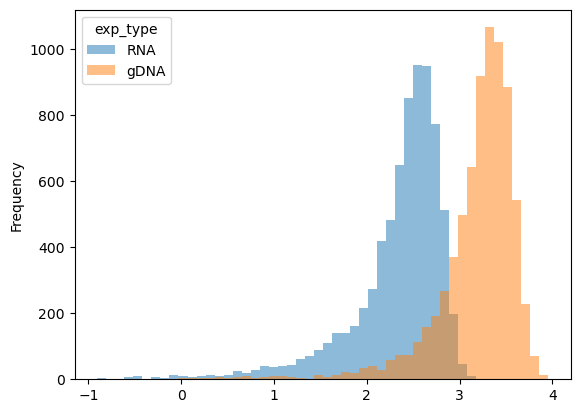

In [9]:
df_mean_vals = df_vals.groupby(level="seq").mean()
with pd.option_context('mode.use_inf_as_na', True):
    np.log10(df_mean_vals).dropna(how="all").plot.hist(bins=50, alpha=0.5)

In [10]:
coverage_filter = (df_mean_vals["RNA"] >= 100) & (df_mean_vals["gDNA"] >= 1000)
coverage_filter

seq
AAAAAAAAACAACAGCACCTGTCCAGGCTTCCTTAGGTACATCTTCTTTGTATCCATTGGGAGGCTCTGAGACTGGCCCCACTTGGTCCTAAGAATCCCAAGGTCTTTGGGAGCGTCCAGCATGTTAATTAGCGTATCATTACATACTGCTATCCCTTTCCATTTCTTTTTGTTCCATCACTCTTC     True
AAAAAAAATAACTAAGCAATAACGTTCAGACTTGACAAGTCAATGTTCTAAGAGAAAGCGAATCAAACACTGGGAACTGGGATGATAAGAAGCTTTAGAGGGAGAAGAATGAACAAACAAGACTGCGAATCACTGGAAGTATAGAATTCTTTTCACTGACGGACAAGCAAGAAATAAGAAAAAAGG    False
AAAAAAAGTTCAAAATACAAAAAAGAAAGAAAGTTTACCTGATATAAAAGATTTCAAAGCAATTTGGATCTAGAAAGCTGAGTCTTATTTTTCTGTGTCTGATTGTGCGACTCTGTTACCTGGTGTACTAGTATGTGAAAAAATAACTGTAAACTAAATCAGTTGTTGCTAAATTGCTTGAAAAGT    False
AAAAAAATTAAATTTTTGACAACCTGAAAATCATAGGAATTTTGCTTGTAAAATCACTACAAGAATAACTCTTTTAAGGCAACTACTAGAGCTTTAAGAAGTCAAAGTATTTAAAGAAAGATCTCCAAGTCTTTATGTTCAATAAACTATTTGAAACACTTAAAAGAATACAGCCTTCTTTTTCCT    False
AAAAAACTAGTCTTCCCCCATCTAATAAATAAGATTTTATATTCTGTTTTCTTATCTAAAAGGGAGAGTCAATGTGGTCTTGTATGGAGAGAAATAGAGAGTAGTACCTGTTGAGATTCTAGCTGAGTGTTGTTTACTACTAGTGAGCTTTCTGAAATATCACATCATAAGATTAGTCAGGTAGTA    False
                

In [11]:
ratio_chars = ratios.groupby(level=["seq", "replicate"]).agg(["mean", "std"])
std_to_mean = (ratio_chars["std"] / ratio_chars["mean"]).unstack("replicate")
std_to_mean

replicate,1,2
seq,,
AAAAAAAAACAACAGCACCTGTCCAGGCTTCCTTAGGTACATCTTCTTTGTATCCATTGGGAGGCTCTGAGACTGGCCCCACTTGGTCCTAAGAATCCCAAGGTCTTTGGGAGCGTCCAGCATGTTAATTAGCGTATCATTACATACTGCTATCCCTTTCCATTTCTTTTTGTTCCATCACTCTTC,0.838524,0.429223
AAAAAAAATAACTAAGCAATAACGTTCAGACTTGACAAGTCAATGTTCTAAGAGAAAGCGAATCAAACACTGGGAACTGGGATGATAAGAAGCTTTAGAGGGAGAAGAATGAACAAACAAGACTGCGAATCACTGGAAGTATAGAATTCTTTTCACTGACGGACAAGCAAGAAATAAGAAAAAAGG,0.979242,1.725511
AAAAAAAGTTCAAAATACAAAAAAGAAAGAAAGTTTACCTGATATAAAAGATTTCAAAGCAATTTGGATCTAGAAAGCTGAGTCTTATTTTTCTGTGTCTGATTGTGCGACTCTGTTACCTGGTGTACTAGTATGTGAAAAAATAACTGTAAACTAAATCAGTTGTTGCTAAATTGCTTGAAAAGT,0.306735,1.154366
AAAAAAATTAAATTTTTGACAACCTGAAAATCATAGGAATTTTGCTTGTAAAATCACTACAAGAATAACTCTTTTAAGGCAACTACTAGAGCTTTAAGAAGTCAAAGTATTTAAAGAAAGATCTCCAAGTCTTTATGTTCAATAAACTATTTGAAACACTTAAAAGAATACAGCCTTCTTTTTCCT,0.917545,1.048540
AAAAAACTAGTCTTCCCCCATCTAATAAATAAGATTTTATATTCTGTTTTCTTATCTAAAAGGGAGAGTCAATGTGGTCTTGTATGGAGAGAAATAGAGAGTAGTACCTGTTGAGATTCTAGCTGAGTGTTGTTTACTACTAGTGAGCTTTCTGAAATATCACATCATAAGATTAGTCAGGTAGTA,0.248907,1.577027
...,...,...
TTTTTTTTTTCTTCTAATTCTGTACTCACAAAAGAGAATCTCATTTTCTTCTTTCTTCCATTCCCTTAAATTCTGAGTACTGTACATATATTTCTGGGTTCCCACGATGATGTGAAAAACTACCAGACTGTTTTTTGTCTTCTCACAAAGACAAGAAAAATCAGGGCATTTTGTGAGTGCCTTAAG,0.736449,1.017543
TTTTTTTTTTGGATGGCTCAAAATATGGTGCTGCTTTATATAAACCTTACATTTATATAGTGCACCTATGAGCAGTTGCCTACCATGTGTCCACCAGAGGCTATTTAATTCATGCCAACTTGAAAACTCTCCAGTTTGTAGGAGTTTGGTTTAATTTATTCAGTTTCATTAGGACTATTTTTATAT,1.160577,1.434264
TTTTTTTTTTTAAAGAAACCTTTTTTAAACTATTTCTAGGTTTGTGAATGTGAAGCCCCAGGCCGCAGGGGGCAAGGGGCCAGGTGCCCCCCACCAGCTGAGAACAAAGTGTCTATCTGGGTGTGGGCCCCTGGCCGCCTCCCTCCAGCCCTGGAGAGGAGGGCAGGGCTGCGGGGAGGCCAGGCC,0.475610,1.653236


Text(37.597222222222214, 0.5, 'Replicate 2\nStd / Mean of RNA/gDNA ratio')

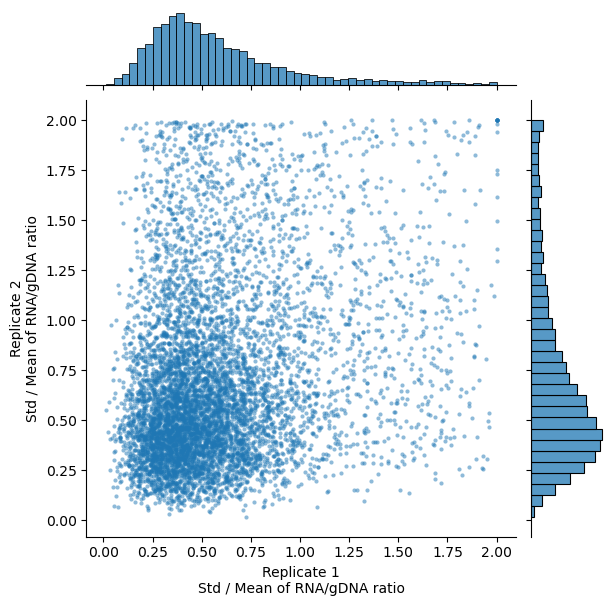

In [12]:
sns.jointplot(x=std_to_mean[1], y=std_to_mean[2], marker=".", lw=0, alpha=0.5)
# plt.xscale("log")
# plt.yscale("log")
plt.xlabel("Replicate 1\n" "Std / Mean of RNA/gDNA ratio")
plt.ylabel("Replicate 2\n" "Std / Mean of RNA/gDNA ratio")

What if we aggregate across replicates?

In [13]:
df_vals_agg = df_vals.groupby(level=["seq", "bins"]).sum()
ratios_agg = df_vals_agg["RNA"] / df_vals_agg["gDNA"]

In [14]:
ratio_chars_agg = ratios.groupby(level="seq").agg(["mean", "std"])
std_to_mean_agg = (ratio_chars_agg["std"] / ratio_chars_agg["mean"])

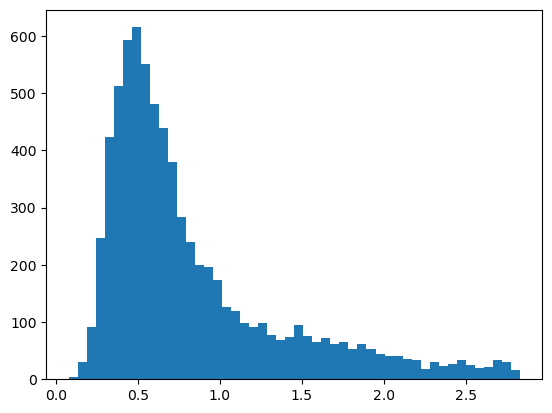

In [15]:
plt.hist(std_to_mean_agg, bins=50)
plt.show()

In [16]:
std_filter = (std_to_mean.max(axis=1) <= 1)
std_filter

seq
AAAAAAAAACAACAGCACCTGTCCAGGCTTCCTTAGGTACATCTTCTTTGTATCCATTGGGAGGCTCTGAGACTGGCCCCACTTGGTCCTAAGAATCCCAAGGTCTTTGGGAGCGTCCAGCATGTTAATTAGCGTATCATTACATACTGCTATCCCTTTCCATTTCTTTTTGTTCCATCACTCTTC     True
AAAAAAAATAACTAAGCAATAACGTTCAGACTTGACAAGTCAATGTTCTAAGAGAAAGCGAATCAAACACTGGGAACTGGGATGATAAGAAGCTTTAGAGGGAGAAGAATGAACAAACAAGACTGCGAATCACTGGAAGTATAGAATTCTTTTCACTGACGGACAAGCAAGAAATAAGAAAAAAGG    False
AAAAAAAGTTCAAAATACAAAAAAGAAAGAAAGTTTACCTGATATAAAAGATTTCAAAGCAATTTGGATCTAGAAAGCTGAGTCTTATTTTTCTGTGTCTGATTGTGCGACTCTGTTACCTGGTGTACTAGTATGTGAAAAAATAACTGTAAACTAAATCAGTTGTTGCTAAATTGCTTGAAAAGT    False
AAAAAAATTAAATTTTTGACAACCTGAAAATCATAGGAATTTTGCTTGTAAAATCACTACAAGAATAACTCTTTTAAGGCAACTACTAGAGCTTTAAGAAGTCAAAGTATTTAAAGAAAGATCTCCAAGTCTTTATGTTCAATAAACTATTTGAAACACTTAAAAGAATACAGCCTTCTTTTTCCT    False
AAAAAACTAGTCTTCCCCCATCTAATAAATAAGATTTTATATTCTGTTTTCTTATCTAAAAGGGAGAGTCAATGTGGTCTTGTATGGAGAGAAATAGAGAGTAGTACCTGTTGAGATTCTAGCTGAGTGTTGTTTACTACTAGTGAGCTTTCTGAAATATCACATCATAAGATTAGTCAGGTAGTA    False
                

In [17]:
df_filtered = df.reset_index(level=(1, 2, 3))[std_filter & coverage_filter]\
                .set_index(["replicate", "exp_type", "fold"], append=True)\
                .rename_axis("bin", axis=1)
df_filtered

/tmp/ipykernel_3711034/3116844462.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df.reset_index(level=(1, 2, 3))[std_filter & coverage_filter]\


bin                                                                             3  \
seq                                                replicate exp_type fold          
GCCTGGGGCCGGTAGAGGCTCCCCAGGGCTCCCTTATGTCCACCACT... 1         RNA      train   146   
                                                             gDNA     train   663   
                                                   2         RNA      train   399   
                                                             gDNA     train  1093   
GGTGAGGGGGCCCTGAATCAGGGGTGACTAGTCCTCATACCCCCCAT... 1         RNA      train   264   
...                                                                           ...   
CTGTGGGCTGGAAAACCACTGGGTGCGTCTCTTGCTGGGGTTTGCCC... 2         gDNA     train  7080   
CCACTCGTGTTCCTTCAGGGGGTACTGCTGGCTGAGGCCCCTGACTT... 1         RNA      train   455   
                                                             gDNA     train  2322   
                                                   2         RNA      train   332   
                                                             gDNA     train  2259   

bin                                                                             4  \
seq                                                replicate exp_type fold          
GCCTGGGGCCGGTAGAGGCTCCCCAGGGCTCCCTTATGTCCACCACT... 1         RNA      train   297   
                                                             gDNA     train   922   
                                                   2         RNA      train   413   
                                                             gDNA     train   947   
GGTGAGGGGGCCCTGAATCAGGGGTGACTAGTCCTCATACCCCCCAT... 1         RNA      train   423   
...                                                                           ...   
CTGTGGGCTGGAAAACCACTGGGTGCGTCTCTTGCTGGGGTTTGCCC... 2         gDNA     train  5579   
CCACTCGTGTTCCTTCAGGGGGTACTGCTGGCTGAGGCCCCTGACTT... 1         RNA      train   509   
                                                             gDNA     train  2280   
                                                   2         RNA      train   315   
                                                             gDNA     train  3479   

bin                                                                             5  \
seq                                                replicate exp_type fold          
GCCTGGGGCCGGTAGAGGCTCCCCAGGGCTCCCTTATGTCCACCACT... 1         RNA      train   307   
                                                             gDNA     train   957   
                                                   2         RNA      train   398   
                                                             gDNA     train  1858   
GGTGAGGGGGCCCTGAATCAGGGGTGACTAGTCCTCATACCCCCCAT... 1         RNA      train   386   
...                                                                           ...   
CTGTGGGCTGGAAAACCACTGGGTGCGTCTCTTGCTGGGGTTTGCCC... 2         gDNA     train  2636   
CCACTCGTGTTCCTTCAGGGGGTACTGCTGGCTGAGGCCCCTGACTT... 1         RNA      train   658   
                                                             gDNA     train  2385   
                                                   2         RNA      train   387   
                                                             gDNA     train  5237   

bin                                                                             6  
seq                                                replicate exp_type fold         
GCCTGGGGCCGGTAGAGGCTCCCCAGGGCTCCCTTATGTCCACCACT... 1         RNA      train   307  
                                                             gDNA     train  1196  
                                                   2         RNA      train   191  
                                                             gDNA     train   689  
GGTGAGGGGGCCCTGAATCAGGGGTGACTAGTCCTCATACCCCCCAT... 1         RNA      train   216  
...                                                                           ...  
CTGTGGGCTG

In [18]:
df_vals_filtered = df_filtered.stack().unstack("exp_type")
df_vals_filtered

exp_type                                                                RNA  \
seq                                                replicate fold  bin        
AAAAAAAAACAACAGCACCTGTCCAGGCTTCCTTAGGTACATCTTCT... 1         train 3    166   
                                                                   4    264   
                                                                   5    264   
                                                                   6    330   
                                                   2         train 3    224   
...                                                                     ...   
TTTTTTTGCAGACCTCCAGAGTGAAGATGGGTGACTAGATGATATGT... 1         train 6    102   
                                                   2         train 3    440   
                                                                   4    109   
                                                                   5     71   
                                                                   6     22   

exp_type                                                                gDNA  
seq                                                replicate fold  bin        
AAAAAAAAACAACAGCACCTGTCCAGGCTTCCTTAGGTACATCTTCT... 1         train 3    1561  
                                                                   4    2254  
                                                                   5    3283  
                                                                   6     844  
                                                   2         train 3    1718  
...                                                                      ...  
TTTTTTTGCAGACCTCCAGAGTGAAGATGGGTGACTAGATGATATGT... 1         train 6     928  
                                                   2         train 3    3436  
                                                                   4    2309  
                                                                   5    1273  
                                                                   6    1500  

[37584 rows x 2 columns]

In [19]:
filtered_replicatewise_ratios = (df_vals_filtered["RNA"] / df_vals_filtered["gDNA"]).rename("RNA/gDNA").unstack("replicate")

In [21]:
df_vals_filtered_aggreplicate = df_vals_filtered.groupby(["seq", "fold", "bin"]).sum()
df_vals_filtered_aggreplicate_ratio = (df_vals_filtered_aggreplicate["RNA"] / df_vals_filtered_aggreplicate["gDNA"]).rename("RNA/gDNA")
df_vals_filtered_aggreplicate_ratio_log = np.log10(df_vals_filtered_aggreplicate_ratio).rename("log_ratio")
df_vals_filtered_aggreplicate_ratio_log_aggbin = df_vals_filtered_aggreplicate_ratio_log.groupby(level=["seq", "fold"]).mean().reset_index()
df_vals_filtered_aggreplicate_ratio_log_aggbin

,seq,fold,log_ratio
0,AAAAAAAAACAACAGCACCTGTCCAGGCTTCCTTAGGTACATCTTC...,train,-0.806329
1,AAAAAACTCACCCGTTTTCCTGGGATTTGTTGTAAGGAGTTTTCAC...,train,-0.798038
2,AAAAAGACATAAACTGGCACCAGTTAACTTTCTTGTACTTTTTTGC...,train,-0.843010
3,AAAAAGTAGGCGCCAATCCCCAGCACCTCTCCTCCTACTCAATTCT...,test,-0.636069
4,AAAAAGTTATGTCCATCCTGTCTTTCTACTACAGATTGCTATGAGG...,train,-0.839152
...,...,...,...
4693,TTTTGTGTTAAACTTTTACTGTTAACACACAGCATGATTTTATCCA...,train,-1.299393
4694,TTTTGTTCAGATCTCTTGAGAGTCATCCATGCAAACTCCAGATGAC...,train,-1.175334
4695,TTTTTCTGCGCTTCAGTAACAAGTGTTGGCAAACGAGACTTTCTCC...,test,-1.297885
4696,TTTTTGGTTGGGCCCAGAAAAATGTGTTAGAGTTTGTCTGTTTATC...,train,-1.189513


In [23]:
df_vals_filtered_aggreplicate_ratio_log_aggbin.to_csv("ratios_log_stability.csv", index=False)

---